In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from stocker import Stocker
from fastai.tabular import add_datepart
import numpy
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import quandl

In [3]:
quandl.ApiConfig.api_key = 'BshViJ52EjWkDVrb9WX3'

def get_stock_prices(stocks_data, companies, start_date, end_date):
    date_range = (start_date, end_date)
    tickers = companies
    tickerobjs = {} 
    for ticker in tickers:
        tickerobjs[ticker] = (Stocker(ticker=ticker))

    for i, (k, v) in enumerate(tickerobjs.items()): 
        print(i, k, v)
    
    count = 1000

    for i, (ticker, stocker) in enumerate(tickerobjs.items()):
        df = stocker.make_df(date_range[0], date_range[1])
        # ddd date features
        add_datepart(df, 'Date', drop=False)
        # drop unwanted columns date feature columns
        df = df.drop(['Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'], axis=1)
        df['Is_month_end'] = df['Is_month_end'].astype(int)
        df['Is_month_start'] = df['Is_month_start'].astype(int)
        # setting index as date
        df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
        df.index = df['Date']
        # sort df by date
        df = df.sort_index(ascending=True, axis=0)

        stocks_data[ticker] = df['Adj. Close']

In [4]:
companies = ['INTL', 'QCOM', 'FB', 'AMZN', 'MCD', 'WFC']
stocks_data = {}
get_stock_prices(stocks_data, companies, '03-01-2017', '06-01-2017')

C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:68: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  self.starting_price = float(self.stock.ix[0, 'Adj. Open'])
C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:71: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  self.most_recent_price = float(self.stock.ix[len(self.stock) - 1, 'y'])


INTL Stocker Initialized. Data covers 1996-11-15 to 2018-03-27.
QCOM Stocker Initialized. Data covers 1991-12-16 to 2018-03-27.
FB Stocker Initialized. Data covers 2012-05-18 to 2018-03-27.
AMZN Stocker Initialized. Data covers 1997-05-16 to 2018-03-27.
MCD Stocker Initialized. Data covers 1970-01-02 to 2018-03-27.
WFC Stocker Initialized. Data covers 1972-06-01 to 2018-03-27.
0 INTL <stocker.Stocker object at 0x000001D8183CBC08>
1 QCOM <stocker.Stocker object at 0x000001D81875E2C8>
2 FB <stocker.Stocker object at 0x000001D8183F0FC8>
3 AMZN <stocker.Stocker object at 0x000001D8188FD248>
4 MCD <stocker.Stocker object at 0x000001D818657C48>
5 WFC <stocker.Stocker object at 0x000001D8182D6348>


C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:176: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  trim_df = df[(df['Date'] >= start_date.date()) &
C:\Users\Tanay\SCB Intern Project\Portfolio Construction\stocker.py:177: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  (df['Date'] <= end_date.date())]


In [5]:
stocks_data

{'INTL': Date
 2017-03-01    39.17
 2017-03-02    38.49
 2017-03-03    38.25
 2017-03-06    38.01
 2017-03-07    37.91
               ...  
 2017-05-25    34.81
 2017-05-26    34.95
 2017-05-30    34.79
 2017-05-31    34.56
 2017-06-01    34.60
 Name: Adj. Close, Length: 65, dtype: float64, 'QCOM': Date
 2017-03-01    55.374710
 2017-03-02    54.753068
 2017-03-03    54.821060
 2017-03-06    54.830773
 2017-03-07    55.102742
                 ...    
 2017-05-25    56.773405
 2017-05-26    56.423731
 2017-05-30    56.247162
 2017-05-31    56.178496
 2017-06-01    57.502766
 Name: Adj. Close, Length: 65, dtype: float64, 'FB': Date
 2017-03-01    137.42
 2017-03-02    136.76
 2017-03-03    137.17
 2017-03-06    137.42
 2017-03-07    137.30
                ...  
 2017-05-25    151.96
 2017-05-26    152.13
 2017-05-30    152.38
 2017-05-31    151.46
 2017-06-01    151.53
 Name: Adj. Close, Length: 65, dtype: float64, 'AMZN': Date
 2017-03-01    853.08
 2017-03-02    848.91
 2017-03-03    8

In [6]:
def build_data(stocks_data):
    data = pd.DataFrame()
    for k in stocks_data:
        data[k] = stocks_data[k]
    return data

In [9]:
data = pd.read_csv('predicted_adj_close_50.csv')
data.index = data['Date']
data = data.drop('Date',1)
data = data.sort_index(ascending=True, axis=0)
data = data.iloc[0:91]
returns = data.pct_change()[1:]
len(returns)

C:\Users\Tanay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


90

In [10]:
returns

,amgn,gd,nwl,zion,mat,vno,sbac,flir,wfc,aee,...,amp,ndaq,ual,apa,re,gww,dte,cf,aig,msci
Date,,,,,,,,,,,,,,,,,,,,,
01-08-2017,0.088428,-0.006540,-0.003192,0.094300,-0.121711,-0.075265,-0.002914,-0.009815,0.015547,-0.004343,...,0.158485,0.144108,0.048552,0.148907,0.094829,0.095826,0.091247,0.094435,0.322936,0.197873
01-09-2017,-0.011335,0.007425,-0.040855,-0.014285,-0.023302,-0.020780,0.005676,0.005417,-0.017704,0.008027,...,0.016869,0.051735,0.013106,0.016133,0.024572,0.029311,0.051935,0.024070,0.118243,0.073536
01-11-2017,0.018692,0.006884,-0.092161,0.034626,-0.290639,-0.021963,-0.005498,0.165222,0.027811,0.000324,...,0.022384,0.069046,0.038222,0.123049,0.028885,0.093662,0.041134,0.091305,0.195390,0.123409
01-12-2017,-0.021926,-0.006070,-0.165562,0.019561,0.419550,0.023540,0.002044,0.000408,-0.005253,-0.000291,...,0.003498,0.040797,0.010993,0.040948,0.003228,0.020795,0.023438,0.010273,0.085679,0.048401
02-06-2017,-0.075971,-0.003380,0.382009,-0.126409,0.195964,0.100701,-0.002838,-0.128957,-0.022017,-0.011021,...,-0.221364,-0.297963,-0.120890,-0.295313,-0.155956,-0.249747,-0.187622,-0.246810,-0.477544,-0.333305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16-11-2017,-0.037366,-0.009392,-0.191921,-0.035626,-0.080623,-0.023252,-0.002177,0.079583,0.001191,0.009054,...,0.010679,0.030861,0.021740,0.067902,0.011148,0.044121,0.025756,0.022403,0.107512,0.059079
17-05-2017,-0.037171,-0.006306,0.386291,-0.053033,0.316543,0.120895,0.000292,-0.129154,-0.000264,-0.005734,...,-0.204849,-0.258390,-0.115497,-0.269024,-0.172470,-0.200438,-0.211060,-0.176477,-0.478991,-0.344293
17-07-2017,0.037671,0.002176,-0.001825,0.058454,-0.035456,-0.009280,0.003449,-0.022210,0.005101,-0.010609,...,0.185707,0.137638,0.045069,0.116830,0.124030,0.094554,0.110982,0.082320,0.291888,0.183163


In [11]:
companies = data.columns
#companies = list(map(lambda x: x.upper(), companies))
companies = list(companies)
len(companies)

50

In [12]:
companies

['amgn',
 'gd',
 'nwl',
 'zion',
 'mat',
 'vno',
 'sbac',
 'flir',
 'wfc',
 'aee',
 'fcx',
 'ksu',
 'mtb',
 'duk',
 'tss',
 'etr',
 'pnr',
 'incy',
 'regn',
 'mdlz',
 'wynn',
 'pep',
 'dva',
 'ads',
 'mnst',
 'sti',
 'akam',
 'tfx',
 'wat',
 'antm',
 'hon',
 'o',
 'usb',
 'ma',
 'rtn',
 'sna',
 'dre',
 'csx',
 'pcar',
 'pru',
 'amp',
 'ndaq',
 'ual',
 'apa',
 're',
 'gww',
 'dte',
 'cf',
 'aig',
 'msci']

Analyzing returns for:  vno


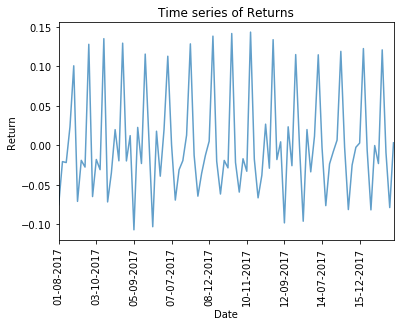

In [13]:
ticker = companies[5]
print("Analyzing returns for: ", ticker)
plt.title('Time series of Returns')
returns[ticker].plot(alpha=0.7)
plt.xticks(rotation=90)
plt.ylabel("Return")
plt.show()

Analyzing returns for:  vno


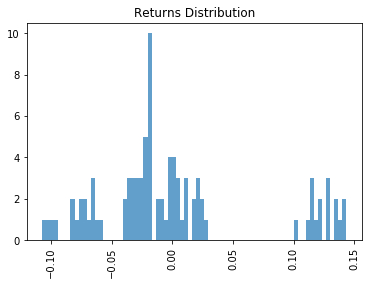

In [14]:

print("Analyzing returns for: ", ticker)
plt.hist(returns[ticker].dropna(), bins=75, density=False, alpha=0.7)
plt.title('Returns Distribution')
plt.xticks(rotation=90)
plt.show()

In [15]:
Covariance = returns.cov()
Correlation = returns.corr()
np.round(Correlation,3)

,amgn,gd,nwl,zion,mat,vno,sbac,flir,wfc,aee,...,amp,ndaq,ual,apa,re,gww,dte,cf,aig,msci
amgn,1.000,0.542,-0.316,0.748,-0.371,-0.368,0.022,0.067,0.508,0.109,...,0.671,0.701,0.636,0.658,0.605,0.675,0.561,0.753,0.576,0.586
gd,0.542,1.000,-0.083,0.402,-0.196,0.027,0.187,0.163,0.543,0.379,...,0.279,0.343,0.375,0.392,0.307,0.385,0.235,0.464,0.215,0.273
nwl,-0.316,-0.083,1.000,-0.563,0.772,0.772,-0.062,-0.856,-0.290,-0.260,...,-0.629,-0.817,-0.813,-0.841,-0.714,-0.847,-0.819,-0.782,-0.861,-0.839
zion,0.748,0.402,-0.563,1.000,-0.439,-0.482,0.155,0.388,0.742,0.117,...,0.757,0.818,0.789,0.795,0.736,0.815,0.705,0.821,0.734,0.733
mat,-0.371,-0.196,0.772,-0.439,1.000,0.833,-0.019,-0.780,-0.207,-0.228,...,-0.643,-0.748,-0.756,-0.786,-0.718,-0.760,-0.778,-0.739,-0.818,-0.810
vno,-0.368,0.027,0.772,-0.482,0.833,1.000,-0.120,-0.686,0.038,-0.178,...,-0.731,-0.806,-0.805,-0.782,-0.796,-0.744,-0.886,-0.710,-0.904,-0.890
sbac,0.022,0.187,-0.062,0.155,-0.019,-0.120,1.000,0.053,-0.072,-0.006,...,0.388,0.245,0.252,0.241,0.411,0.250,0.316,0.185,0.215,0.241
flir,0.067,0.163,-0.856,0.388,-0.780,-0.686,0.053,1.000,0.270,0.274,...,0.405,0.607,0.652,0.676,0.540,0.657,0.652,0.588,0.706,0.696
wfc,0.508,0.543,-0.290,0.742,-0.207,0.038,-0.072,0.270,1.000,0.145,...,0.325,0.400,0.401,0.454,0.294,0.482,0.219,0.511,0.277,0.289
aee,0.109,0.379,-0.260,0.117,-0.228,-0.178,-0.006,0.274,0.145,1.000,...,0.152,0.242,0.347,0.316,0.174,0.280,0.200,0.333,0.201,0.244


In [16]:
def correlation_matrix_plot(matrix, maptype):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    if (maptype == 'cmap'):
        cax = ax1.imshow(matrix, interpolation="nearest", cmap=cmap, alpha=0.7)
    else:
        cax = ax1.imshow(matrix, interpolation="nearest", cmap=maptype, alpha=0.7)
    ax1.grid(True)
    plt.title('Stocks Correlation')
    ax1.set_xticks(np.arange(len(companies)))
    ax1.set_yticks(np.arange(len(companies)))
    ax1.set_xticklabels(companies,fontsize=10,rotation=90)
    ax1.set_yticklabels(companies,fontsize=10)
    ax1.set_alpha(0.4)
    ticks = numpy.arange(0,9,1)
    fig.colorbar(cax)
    plt.show()

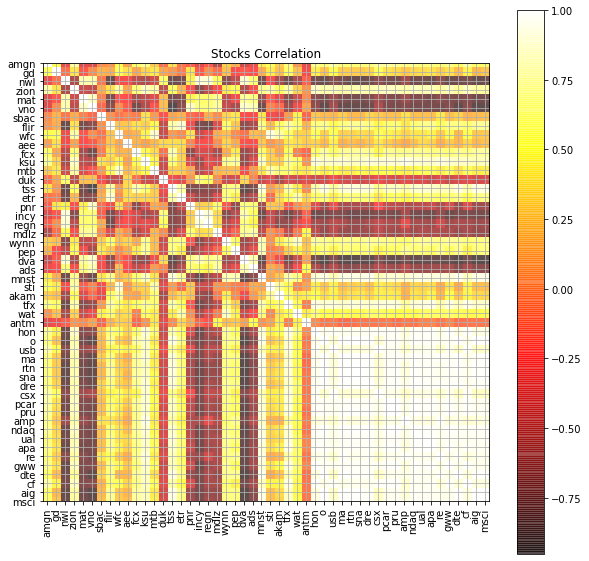

In [17]:
correlation_matrix_plot(Correlation,'hot')

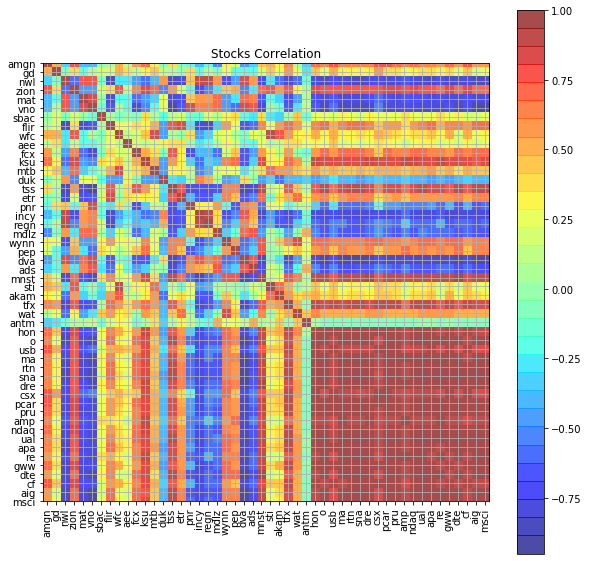

In [18]:
correlation_matrix_plot(Correlation,'cmap')

In [19]:
mean_Covariance = Covariance.mean()

In [21]:
def get_pairable(data, Covariance, Correlation):
    Pairable = np.zeros(Covariance.shape)
    plt.figure(figsize=(16,7))

    for i in range(len(companies)):
        for j in range(len(companies)-i):
            if(Covariance[i,j] > mean_Covariance[i] or Covariance[i,j] > mean_Covariance[j] or Correlation[i][j]>0.5):
                plt.plot(i, j, 'o', color='green', alpha=0.5) 
            else:
                plt.plot(i, j, 'o', color='blue', alpha=0.5)
                Pairable[i,j] = 1

    plt.xlim(-1,len(companies)+1)
    plt.ylim(-1,len(companies)+1)
    plt.xticks(range(len(companies)), companies, rotation=40)    
    plt.yticks(range(len(companies)), companies)
    #plt.set_xticklabels(companies,fontsize=10,rotation=40)
    plt.legend()
    return Pairable

No handles with labels found to put in legend.


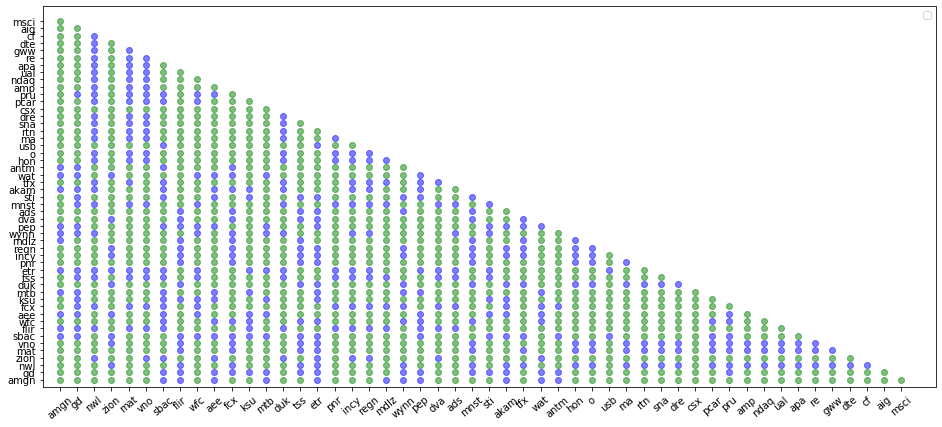

In [22]:
Pairable = get_pairable(data,np.array(Covariance), np.array(Correlation))

In [23]:
Rf = 2/100  #risk_free_rate
stocks_rng = range(len(companies))

def sharpe_ratio(pair, portfolio_weights, meanR, cov):    
    Rp = portfolio_weights.dot(meanR.T) 
    SigmaP = portfolio_weights.dot(cov.dot(portfolio_weights.T)) * len(returns)
    s_ratio = (Rp - Rf)/np.sqrt(SigmaP)
    return s_ratio

# portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, 
#                             np.dot(cov_mat_annual, portfolio_weights)))

In [24]:

def check_pairs(pair):
    not_in_pair = []
    for i in stocks_rng:
        if(i not in pair):
            not_in_pair.append(i)
        else:
            continue
            
    for tick in not_in_pair:
        total_pair = len(pair)
        for i in pair:
            if(Pairable[tick,i]!=1 or Pairable[i,tick]!=1):
                total_pair -= 1
        if(float(total_pair)/len(pair) > 0.5):
            pair.add(tick)              
    return pair

In [25]:
portfolio_collection = []
optim = {'good':[],'better':[],'best': []}

def select(combo):
    pair = set(combo)
    pair = check_pairs(pair)
    #print("new pair by checking pairable: ", pair)
    if pair in portfolio_collection:
        #print('returning')
        return
    portfolio_collection.append(pair)
    #print("portfoilio: ", portfolio_collection)
    sharpe_r = 0
    eff_weights = np.ones(len(pair))

    symbols = [companies[s] for s in pair]        
    mean_returns = np.array(returns[symbols].mean()) * len(returns)
    sub_cov_mat = np.array(returns[symbols].cov())        

    for _ in range(200):
        weights = [np.random.randint(50,500) for _ in pair]
        weights = np.array(weights, dtype=float)
        weights /= weights.sum()
        s_r = sharpe_ratio(pair, weights, mean_returns, sub_cov_mat)
        if( s_r > sharpe_r):
            sharpe_r = s_r
            eff_weights = weights
        
    if (sharpe_r >= 1 and sharpe_r < 2) :
        optim['good'].append([[companies[s] for s in pair],eff_weights,sharpe_r])
    if (sharpe_r >= 2 and sharpe_r < 3) :
        optim['better'].append([[companies[s] for s in pair],eff_weights,sharpe_r])
    if(sharpe_r >=3) :
        optim['best'].append([[companies[s] for s in pair],eff_weights,sharpe_r])

In [26]:
from itertools import combinations
count=0
run = list(combinations(stocks_rng,2))
for combo in run:
    count +=1
    if(Pairable[combo[0],combo[1]]!=1 or Pairable[combo[1],combo[0]]!=1):
        continue
    else:
        #print("taking the combo")
        select(combo)
print("number of combinations: ", count)

number of combinations:  1225


In [27]:
optim['good']

[[['nwl', 'flir'], array([0.364742, 0.635258]), 1.958645423366007],
 [['nwl', 'fcx', 'wynn', 'ads'],
  array([0.225171, 0.330479, 0.377568, 0.066781]),
  1.6999015630204855],
 [['nwl', 'tss'], array([0.334792, 0.665208]), 1.9147456745002793],
 [['mnst', 'nwl'], array([0.682864, 0.317136]), 1.6445241887430837],
 [['nwl', 'tfx'], array([0.249035, 0.750965]), 1.666628064161694],
 [['nwl', 'hon'], array([0.293478, 0.706522]), 1.6747927130542142],
 [['nwl', 'dre'], array([0.300341, 0.699659]), 1.6919259032831522],
 [['nwl', 'pcar'], array([0.222656, 0.777344]), 1.4404698940963596],
 [['nwl', 'pru'], array([0.221198, 0.778802]), 1.5688967489258758],
 [['amp', 'nwl'], array([0.58277, 0.41723]), 1.5313001707085439],
 [['nwl', 'ual'], array([0.28125, 0.71875]), 1.6897399081466316],
 [['nwl', 're'], array([0.366197, 0.633803]), 1.5563033556167574],
 [['nwl', 'cf'], array([0.386992, 0.613008]), 1.965953330803632],
 [['incy', 'zion', 'vno', 'etr'],
  array([0.240942, 0.29529 , 0.115942, 0.347826])

In [28]:
optim['better']

[[['incy', 'nwl', 'zion', 'etr'],
  array([0.076582, 0.1798  , 0.27081 , 0.472808]),
  2.2720396908480045],
 [['nwl', 'zion', 'vno', 'etr'],
  array([0.195796, 0.234513, 0.065265, 0.504425]),
  2.2568366215032163],
 [['nwl', 'fcx', 'incy', 'wynn', 'akam'],
  array([0.122093, 0.17907 , 0.153488, 0.310465, 0.234884]),
  2.1112571697737574],
 [['nwl', 'o'], array([0.453448, 0.546552]), 2.7398638483929116],
 [['ma', 'nwl'], array([0.607251, 0.392749]), 2.088969195819016],
 [['nwl', 'rtn'], array([0.458167, 0.541833]), 2.8908414670851],
 [['ndaq', 'nwl'], array([0.546218, 0.453782]), 2.4519860521344325],
 [['nwl', 'apa'], array([0.467822, 0.532178]), 2.7164027869776546],
 [['nwl', 'gww'], array([0.402477, 0.597523]), 2.342873248987918],
 [['nwl', 'dte'], array([0.394286, 0.605714]), 2.0964172319763046],
 [['mat', 'o'], array([0.416961, 0.583039]), 2.425276215157195],
 [['ma', 'mat'], array([0.642674, 0.357326]), 2.044366103654459],
 [['rtn', 'mat'], array([0.585938, 0.414062]), 2.5222223438

In [29]:
optim['best']

[[['nwl', 'sna'], array([0.510436, 0.489564]), 3.2044864683284158]]

In [30]:
portfolio_collection

[{0, 6, 7, 9, 11, 12, 15, 21, 25, 26},
 {0, 6, 7, 11, 12, 15, 21, 25},
 {0, 7, 19, 21},
 {0, 12, 15, 20, 21, 25},
 {0, 9, 12, 21, 26, 28},
 {0, 6, 7, 21, 26, 29},
 {1, 6, 7, 9, 11, 12, 15, 21, 25, 26},
 {1, 6, 7, 10, 11, 12, 15, 21, 25, 26},
 {1, 6, 7, 11, 12, 14, 15, 21, 25},
 {1, 6, 7, 11, 12, 15, 21, 25},
 {1, 10, 12, 20, 28},
 {1, 24, 25},
 {1, 6, 7, 9, 10, 11, 12, 21, 25, 26},
 {1, 9, 10, 12, 20, 21, 25, 28},
 {1, 6, 7, 10, 11, 26, 29},
 {1, 6, 7, 9, 11, 12, 15, 21, 25, 39},
 {2, 3, 15, 17},
 {2, 7},
 {2, 10, 20, 23},
 {2, 14},
 {2, 3, 5, 15},
 {2, 10, 17, 20, 26},
 {2, 24},
 {2, 27},
 {2, 30},
 {2, 31},
 {2, 33},
 {2, 34},
 {2, 35},
 {2, 36},
 {2, 38},
 {2, 39},
 {2, 40},
 {2, 41},
 {2, 42},
 {2, 43},
 {2, 44},
 {2, 45},
 {2, 46},
 {2, 47},
 {3, 5, 15, 17},
 {3, 6, 9, 11, 12, 15, 21, 25},
 {3, 6, 8, 9, 11, 12, 15, 21, 25, 28},
 {3, 13, 15, 17},
 {3, 15, 17, 18},
 {3, 15, 17, 22},
 {3, 9, 12, 21, 28},
 {4, 7},
 {4, 10},
 {4, 14},
 {4, 15},
 {4, 24},
 {4, 27},
 {4, 30},
 {4, 31},
 

In [31]:

better = pd.DataFrame.from_dict(optim['better'])
better.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']

In [32]:
portfolio_return = []

for row in better.iterrows():
    #print(row[1][0])
    mean = np.array(returns[row[1][0]].mean()) * len(returns)
    #mean = ((1+np.mean(returns[row[1][0]]))**252)-1 #annulazied return for 252 trading days
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    #print('Rp:', Rp)
    
better['Portfolio Return'] = portfolio_return

In [33]:
portfolio_volatility = []

for row in better.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

better['Portfolio Volatility'] = portfolio_volatility
better

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[incy, nwl, zion, etr]","[0.07658157602663707, 0.17980022197558268, 0.2...",2.272040,35.54,0.752713
1,"[nwl, zion, vno, etr]","[0.19579646017699115, 0.2345132743362832, 0.06...",2.256837,34.64,0.855055
2,"[nwl, fcx, incy, wynn, akam]","[0.12209302325581395, 0.17906976744186046, 0.1...",2.111257,36.28,1.052649
3,"[nwl, o]","[0.453448275862069, 0.5465517241379311]",2.739864,101.44,1.640941
4,"[ma, nwl]","[0.6072507552870091, 0.39274924471299094]",2.088969,77.77,3.592753
5,"[nwl, rtn]","[0.4581673306772908, 0.5418326693227091]",2.890841,107.15,6.448249
6,"[ndaq, nwl]","[0.5462184873949579, 0.453781512605042]",2.451986,103.13,2.073197
7,"[nwl, apa]","[0.46782178217821785, 0.5321782178217822]",2.716403,109.64,3.229611
8,"[nwl, gww]","[0.4024767801857585, 0.5975232198142415]",2.342873,79.32,8.461332
9,"[nwl, dte]","[0.3942857142857143, 0.6057142857142858]",2.096417,75.22,2.794012


C:\Users\Tanay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


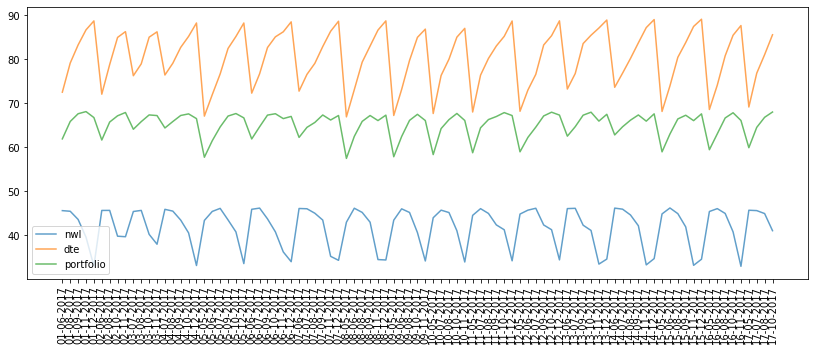

In [34]:

def plot_volatility(portfolio, weights):
    portfolio_data = data[portfolio]
    volatility = portfolio_data.mul(weights,axis=1).sum(axis=1)
    portfolio_data['portfolio'] = volatility
    plt.figure(figsize=(14,5))
    plt.plot(portfolio_data.index, portfolio_data,alpha=0.7)
    plt.legend(portfolio + ['portfolio'])
    plt.xticks(rotation=90)
    plt.show()

plot_volatility(better['Portfolio'][9], better['Weights'][9])

In [35]:
better['PortfolioL'] = better['Portfolio'].apply(lambda x: ','.join(map(str, x)))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1008x360 with 0 Axes>

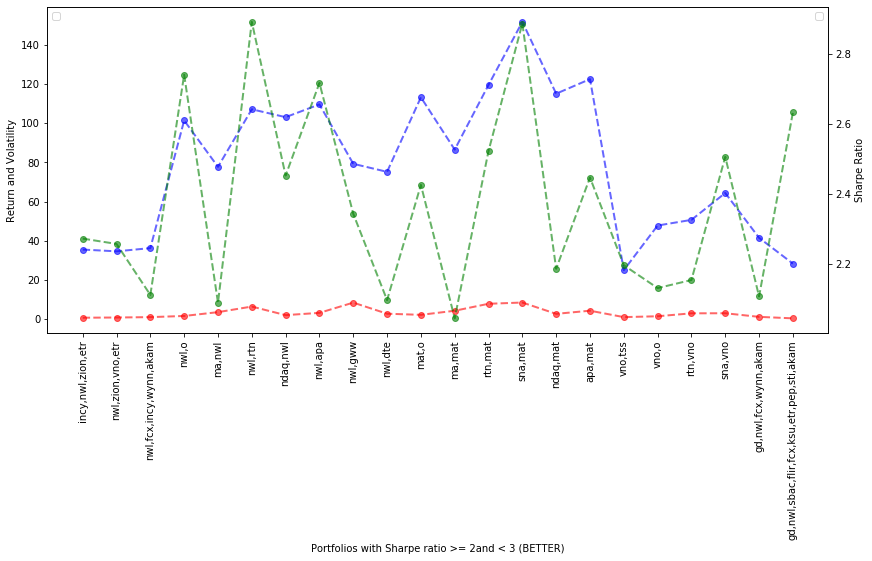

In [36]:
plt.figure(figsize=(14,5))
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
ax2.plot(better['PortfolioL'], better['Sharpe Ratio'], 'g-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(better['PortfolioL'], better['Portfolio Return'], 'b-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(better['PortfolioL'],better['Portfolio Volatility'], 'r-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)

ax1.set_xlabel('Portfolios with Sharpe ratio >= 2and < 3 (BETTER)')
ax1.set_ylabel('Return and Volatility')
ax2.set_ylabel('Sharpe Ratio')
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax2.set_alpha(0.4)
#ax1.set_alpha(0.4)
plt.show()

In [37]:
good = pd.DataFrame.from_dict(optim['good'])
good.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']
portfolio_return = []

for row in good.iterrows():
    #print(row[1][0])
    mean = np.array(returns[row[1][0]].mean()) * len(returns)
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    
good['Portfolio Return'] = portfolio_return

portfolio_volatility = []

for row in good.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

good['Portfolio Volatility'] = portfolio_volatility
good

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[nwl, flir]","[0.364741641337386, 0.6352583586626139]",1.958645,57.17,0.615365
1,"[nwl, fcx, wynn, ads]","[0.22517123287671234, 0.3304794520547945, 0.37...",1.699902,44.50,1.300650
2,"[nwl, tss]","[0.3347921225382932, 0.6652078774617067]",1.914746,56.11,1.559278
3,"[mnst, nwl]","[0.6828644501278772, 0.3171355498721228]",1.644524,48.73,1.149781
4,"[nwl, tfx]","[0.24903474903474904, 0.750965250965251]",1.666628,38.20,4.956954
5,"[nwl, hon]","[0.29347826086956524, 0.7065217391304348]",1.674793,45.60,2.473484
6,"[nwl, dre]","[0.3003412969283277, 0.6996587030716723]",1.691926,47.12,0.944139
7,"[nwl, pcar]","[0.22265625, 0.77734375]",1.440470,32.13,0.942063
8,"[nwl, pru]","[0.22119815668202766, 0.7788018433179723]",1.568897,32.88,1.432303
9,"[amp, nwl]","[0.5827702702702703, 0.4172297297297297]",1.531300,85.41,4.885893


In [38]:

good['PortfolioL'] = good['Portfolio'].apply(lambda x: ','.join(map(str, x)))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1008x360 with 0 Axes>

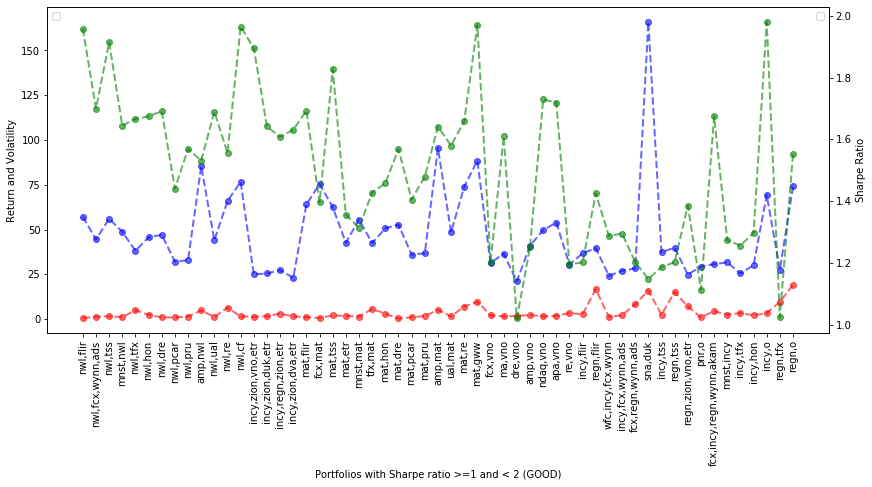

In [39]:
plt.figure(figsize=(14,5))
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
ax2.plot(good['PortfolioL'], good['Sharpe Ratio'], 'g-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(good['PortfolioL'], good['Portfolio Return'], 'b-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(good['PortfolioL'],good['Portfolio Volatility'], 'r-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)

ax1.set_xlabel('Portfolios with Sharpe ratio >=1 and < 2 (GOOD)')
ax1.set_ylabel('Return and Volatility')
ax2.set_ylabel('Sharpe Ratio')
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax2.set_alpha(0.4)
#ax1.set_alpha(0.4)
plt.show()

In [40]:
best = pd.DataFrame.from_dict(optim['best'])
best.columns = ['Portfolio', 'Weights', 'Sharpe Ratio']
portfolio_return = []

for row in best.iterrows():
    #print(row[1][0])
    mean = np.array(returns[row[1][0]].mean()) * len(returns)
    portfolio_weights = np.array(row[1][1])
    Rp = portfolio_weights.dot(mean.T) 
    portfolio_return.append(round(Rp * 100, 2))
    
best['Portfolio Return'] = portfolio_return

portfolio_volatility = []

for row in best.iterrows():
    portfolio = row[1][0]
    portfolio_weights = row[1][1]
    portfolio_data = data[portfolio]
    portfolio = portfolio_data.mul(portfolio_weights,axis=1).sum(axis=1)
    volatility = np.std(portfolio)
    portfolio_volatility.append(volatility)

best['Portfolio Volatility'] = portfolio_volatility
best

,Portfolio,Weights,Sharpe Ratio,Portfolio Return,Portfolio Volatility
0,"[nwl, sna]","[0.5104364326375711, 0.48956356736242884]",3.204486,135.38,6.908564


In [41]:
best['PortfolioL'] = best['Portfolio'].apply(lambda x: ','.join(map(str, x)))

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1008x360 with 0 Axes>

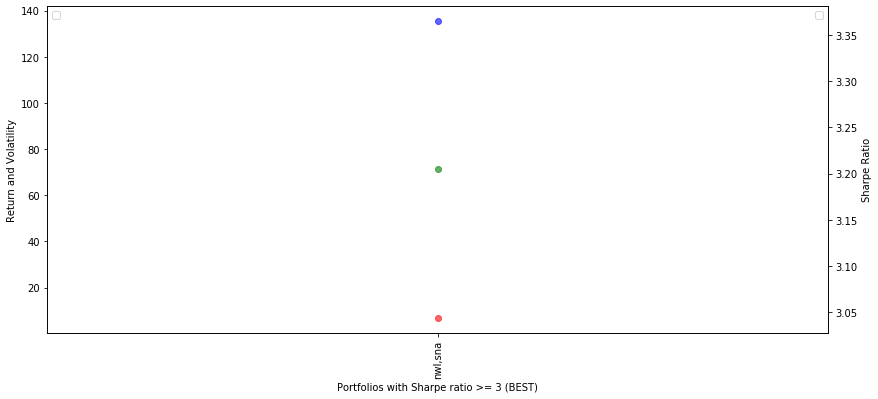

In [42]:
plt.figure(figsize=(14,5))
fig, ax1 = plt.subplots(figsize=(14,6))

ax2 = ax1.twinx()
ax2.plot(best['PortfolioL'], best['Sharpe Ratio'], 'g-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(best['PortfolioL'], best['Portfolio Return'], 'b-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)
ax1.plot(best['PortfolioL'],best['Portfolio Volatility'], 'r-', alpha=0.6, marker='o', 
         linestyle='dashed', linewidth=2, markersize=6)

ax1.set_xlabel('Portfolios with Sharpe ratio >= 3 (BEST)')
ax1.set_ylabel('Return and Volatility')
ax2.set_ylabel('Sharpe Ratio')
ax1.xaxis.set_tick_params(rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#ax2.set_alpha(0.4)
#ax1.set_alpha(0.4)
plt.show()

In [43]:

def get_ticker_volatility(portfolio):
    tick_std = np.std(data[portfolio])
    print(tick_std)

In [44]:
get_ticker_volatility(better['Portfolio'][7])

nwl    4.525482
apa    9.050742
dtype: float64


In [45]:
better['Portfolio Volatility'][7]


3.2296105522003504